In [1]:
import os 
import sys
import glob
from tqdm import tqdm

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

import MDAnalysis as mda
from MDAnalysis.analysis import distances
from MDAnalysis.analysis.rms import RMSD

In [3]:
sys.path.append('../py_modules/')

In [4]:
pdb_file = '../../../pdb/1kbh.pdb'
ref_pdb = '../../../pdb/1kbh.pdb'
traj_files = sorted(glob.glob('../../result_1578294443_succ/omm_results/omm_runs_*/output.dcd'))

In [5]:
rmsd_profs = [] 
ref_traj = mda.Universe(ref_pdb)
for traj_file in tqdm(traj_files): 
    mda_traj = mda.Universe(pdb_file, traj_file) 
    rmsd_inst = RMSD(mda_traj, ref_traj, select='protein and name CA') 
    rmsd_inst.run() 
    rmsd_profs.append(rmsd_inst.rmsd)

100%|██████████| 1200/1200 [03:52<00:00,  8.90it/s]


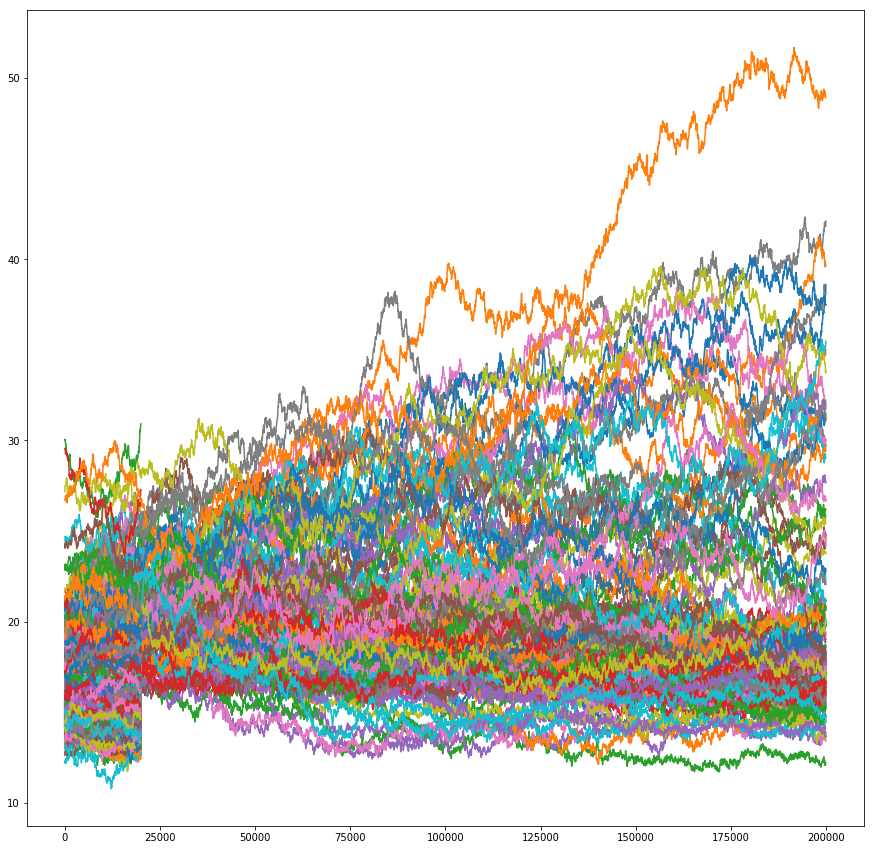

In [6]:
fig, ax = plt.subplots(figsize=(15,15)) 
n_traj = 0 
for j, rmsd in enumerate(rmsd_profs): 
    ax.plot(rmsd[:,1], rmsd[:,2]) 
        

In [7]:
actr_sel = 'protein and name CA and resnum 1-47' 
ncbd_sel = 'protein and name CA and resnum 48-106' 

distance_profs = [] 
for traj_file in tqdm(traj_files): 
    mda_traj = mda.Universe(pdb_file, traj_file) 
    actr_traj = mda_traj.select_atoms(actr_sel) 
    ncbd_traj = mda_traj.select_atoms(ncbd_sel) 
    dist_prof = [min(distances.distance_array(actr_traj.positions, ncbd_traj.positions).flatten())
                 for _ in mda_traj.trajectory]
#     for _ in mda_traj.trajectory: 
#         dist = distances.distance_array(actr_traj.positions, ncbd_traj.positions) 
#         dist_prof += [min(dist.flatten())]
    distance_profs.append(dist_prof)

100%|██████████| 1200/1200 [06:28<00:00,  4.90it/s]


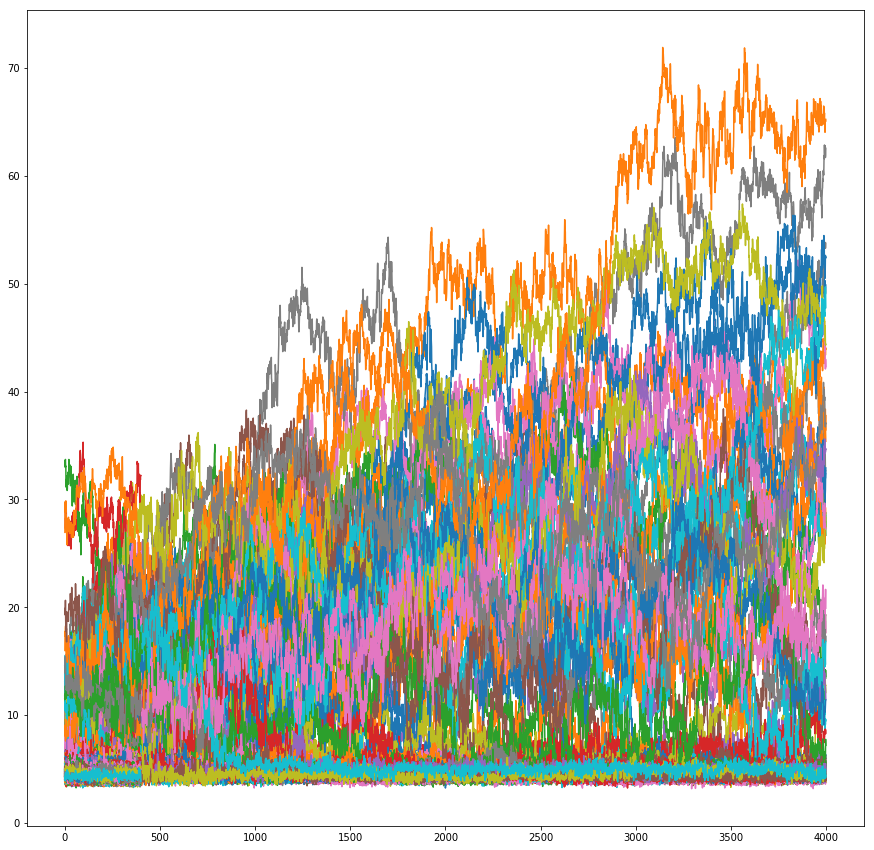

In [8]:
fig, ax = plt.subplots(figsize=(15,15)) 
n_traj = 0 
for j, dist_prof in enumerate(distance_profs): 
    ax.plot(dist_prof) 

In [18]:
%run ~/.matplotlib.py

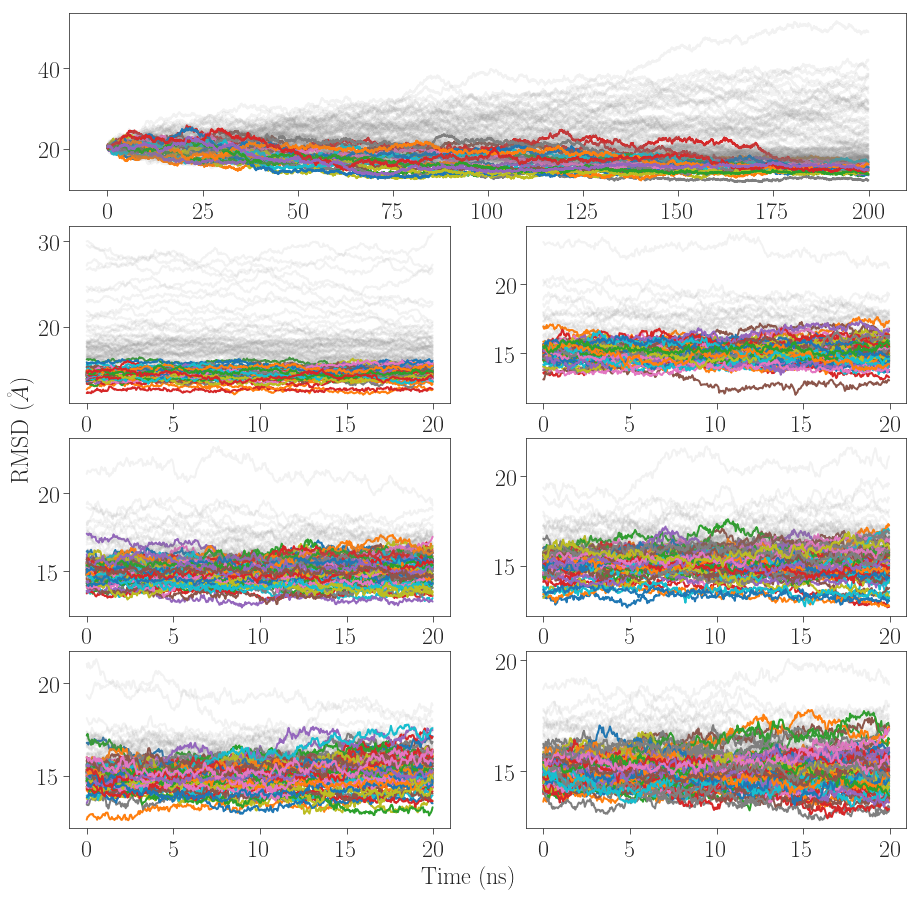

In [20]:
fig = plt.figure(figsize=(15, 15)) 
ax1 = plt.subplot(4, 1, 1)

for j, rmsd in enumerate(rmsd_profs[0:120]): 
    if min(rmsd[:,2]) < 15:
        transition = True 
        plot_setup = {'alpha' : 1} 
    else: 
        transition = False 
        plot_setup = {'alpha' : 0.1, 'color': 'gray'}
    ax1.plot(rmsd[:,1]/1000, rmsd[:,2], **plot_setup) 

# y_setup = ax1.get_ylim() 
ax_list = [ax1] 


for i in range(6): 
    ax = plt.subplot(4, 2, i+3)
    for j, rmsd in enumerate(rmsd_profs[120*(i+1):120*(i+2)]): 
        if min(rmsd[:,2]) < 15: # and min(rmsd[:,2]) < 2: 
            transition = True 
            plot_setup = {'alpha' : 1} 
        else: 
            transition = False 
            plot_setup = {'alpha' : 0.1, 'color': 'gray'}
        ax.plot(rmsd[:,1]/1000, rmsd[:,2], **plot_setup) 
#         ax.set_ylim(y_setup)
        ax_list += [ax]
        
ax_list[-1].set_xlabel('Time (ns)', position=(-.15, 0))
ax_list[3].set_ylabel(r'RMSD ($\AA$)', position=(0, -.15)) 
fig.savefig('ncbd_actr.pdf', dpi=300, bbox_inches='tight')

In [77]:
frame_mini_RMSD = np.argmin(np.vstack(rmsd_profs)[:120,2])

print np.min(np.vstack(rmsd_profs)[:120,2])

traj_dict = {}
for traj_file in tqdm(sorted(traj_files[:])): 
    mda_traj = mda.Universe(pdb_file, traj_file) 
    traj_dict[traj_file] = len(mda_traj.trajectory)

from utils import find_frame, write_pdb_frame 
frame_mini_RMSD = np.argmin(np.vstack(rmsd_profs)[:120,2])
traj_frame = find_frame(traj_dict, frame_mini_RMSD) 
print traj_frame

# write_pdb_frame(traj_frame[0], pdb_file, traj_frame[1], 'low_RMSD.pdb')

  0%|          | 4/1200 [00:00<00:30, 39.61it/s]

17.51730041626874


100%|██████████| 1200/1200 [00:20<00:00, 57.75it/s]

('../../result_1578294443_succ/omm_results/omm_runs_1577629331/output.dcd', 112)


In [10]:
frame_mini_RMSD = np.argmin(np.vstack(rmsd_profs)[:,2])

print np.min(np.vstack(rmsd_profs)[:,2])

traj_dict = {}
for traj_file in tqdm(sorted(traj_files[:])): 
    mda_traj = mda.Universe(pdb_file, traj_file) 
    traj_dict[traj_file] = len(mda_traj.trajectory)

from utils import find_frame, write_pdb_frame 
frame_mini_RMSD = np.argmin(np.vstack(rmsd_profs)[:,2])
traj_frame = find_frame(traj_dict, frame_mini_RMSD) 
print traj_frame

write_pdb_frame(traj_frame[0], pdb_file, traj_frame[1], 'low_RMSD.pdb')

  0%|          | 5/1200 [00:00<00:27, 43.34it/s]

10.768393851993793


100%|██████████| 1200/1200 [00:22<00:00, 58.99it/s]


('../../result_1578294443_succ/omm_results/omm_runs_1578216210/output.dcd', 244)


'low_RMSD.pdb'

In [22]:
rmsd_results = np.vstack(rmsd_profs)[:,2] 

In [49]:
sel_indice = np.where(rmsd_results < 11.2)

In [50]:
len(sel_indice[0])

16

In [52]:
for ind in sel_indice[0]: 
    traj_frame = find_frame(traj_dict, ind) 
    write_pdb_frame(traj_frame[0], pdb_file, traj_frame[1], 'low_RMSD_%.2f.pdb' % rmsd_results[ind])

In [58]:
len(rmsd_results)

912000

In [67]:
rmsd_sel = rmsd_results[dist_results<=5] 

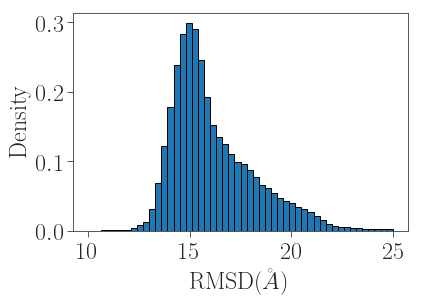

In [75]:
dist_results = np.hstack(distance_profs)
_ = plt.hist(rmsd_sel, bins=50, density=True, range=(10,25)) 
plt.xlabel(r'RMSD($\AA$)') 
plt.ylabel(r'Density') 
plt.savefig('rmsd_d_lst_5A.pdf', dpi=300, bbox_inches='tight')